In [101]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from keras.layers import Dense
from tensorflow.keras import Sequential

In [53]:
import zipfile

local_file = 'cancer_data.zip'

zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data')
zip_ref.close()

In [54]:
# Load dataset from CSV
df = pd.read_csv('data/Cancer_Data.csv')  

# Menghapus kolom yang NaN (Unnamed: 32) dan yang tidak diperlukan (id)
df_clean = df.drop('Unnamed: 32', axis=1)
df_clean = df_clean.drop('id', axis=1)

# Mengubah isi pada kolom diagnosis dari M dan B menjadi 1 dan 0
df_clean['diagnosis'].replace('M',1,inplace=True)
df_clean['diagnosis'].replace('B',0,inplace= True)

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [55]:
x = df_clean.iloc[:, 1:].values
y = df_clean.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 110)

In [94]:
model = Sequential()
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [96]:
model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'], optimizer='adam')


In [98]:
history = model.fit(X_train,y_train,epochs=100,verbose=1, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
15/15 [==============================] - 0s 14ms/step - loss: 0.1608 - binary_accuracy: 0.9297 - val_loss: 0.2378 - val_binary_accuracy: 0.8509
Epoch 2/100
15/15 [==============================] - 0s 12ms/step - loss: 0.1529 - binary_accuracy: 0.9407 - val_loss: 0.1346 - val_binary_accuracy: 0.9649
Epoch 3/100
15/15 [==============================] - 0s 12ms/step - loss: 0.1347 - binary_accuracy: 0.9407 - val_loss: 0.1583 - val_binary_accuracy: 0.9123
Epoch 4/100
15/15 [==============================] - 0s 14ms/step - loss: 0.1370 - binary_accuracy: 0.9385 - val_loss: 0.2005 - val_binary_accuracy: 0.8772
Epoch 5/100
15/15 [==============================] - 0s 10ms/step - loss: 0.2374 - binary_accuracy: 0.8923 - val_loss: 0.1765 - val_binary_accuracy: 0.9211
Epoch 6/100
15/15 [==============================] - 0s 11ms/step - loss: 0.2128 - binary_accuracy: 0.9055 - val_loss: 0.1730 - val_binary_accuracy: 0.9298
Epoch 7/100
15/15 [==============================] - 0s 9ms/step

In [99]:
final_validation_accuracy = history.history['val_binary_accuracy'][-1]

print(f'Akurasi terakhir pada data validasi: {final_validation_accuracy}')

Akurasi terakhir pada data validasi: 0.9649122953414917


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


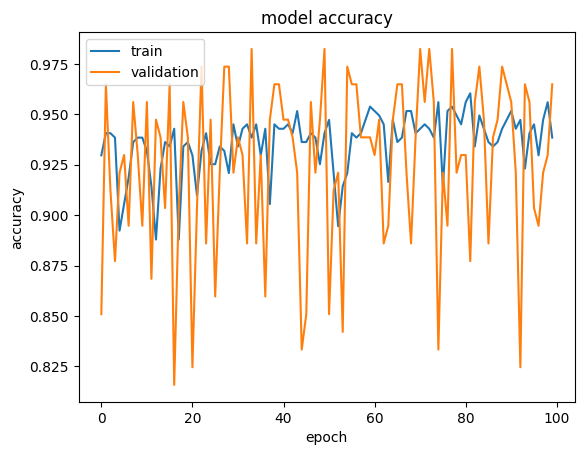

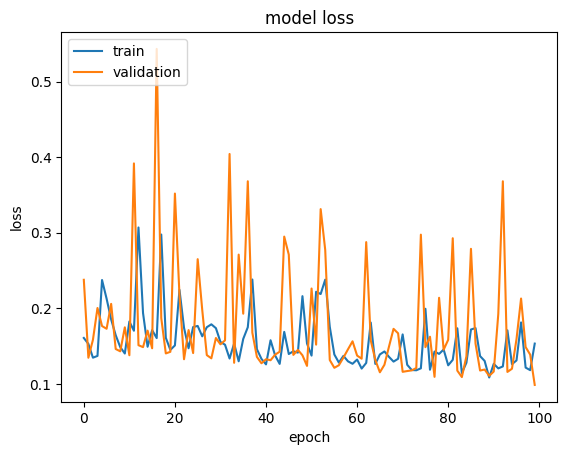

In [100]:
print(history.history.keys())

#  "Accuracy"
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [102]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 1024)              31744     
                                                                 
 dense_42 (Dense)            (None, 512)               524800    
                                                                 
 dense_43 (Dense)            (None, 128)               65664     
                                                                 
 dense_44 (Dense)            (None, 1)                 129       
                                                                 
Total params: 622337 (2.37 MB)
Trainable params: 622337 (2.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
